<h2 align="center" style="font-family:Times,serif">Digits Classification Project</h2>

# Digits Classification

## Libraries Import

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import math

## Read Data

In [2]:
data = pd.read_csv("train.csv") #read data
data.head() #display heads 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split & Save Data

In [3]:
data = np.array(data) # save data as array
data.shape

(42000, 785)

In [4]:
m , n = data.shape #save dimensions 
np.random.shuffle(data) # shuffle data randomly 

In [5]:
training_data = data[0:20000].T # transpose data to be 785* number of images
training_data.shape

(785, 20000)

In [6]:
y_train = training_data[0] # split labels
x_train = training_data[1:n] # rest of the columns
x_train = x_train/255. # normalizing data

## Parameter Intialization

In [7]:
def parameters():
    W1 = np.random.rand(10,784) * 2 - 1
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) * 2 - 1
    b2 = np.random.rand(10,1) - 0.5
    return W1 , b1 , W2 , b2 

## Forward Propagation

In [8]:
def ReLU(z):
    return np.maximum(0,z) # for each element in z if >0 then return z else return 0

def softMax(z):
    A = np.exp(z)/ sum(np.exp(z))
    return A 
    
def forward_propagation(W1,b1,W2,b2,x):
    Z1 = W1.dot(x) + b1  #summation for layer 1
    A1 = ReLU(Z1)        # Activation for layer 1
    Z2 = W2.dot(A1) + b2  #summation for layer 2
    A2 = softMax(Z2)      #activation for layer 2
    return Z1 ,A1 , Z2 , A2

## Back_Propagation

In [9]:
def encode(y): # to encode the actual output as a matrix  
    encode_y = np.zeros((y.size,y.max()+1)) # zero matrix with number of examples(m Size) * number of classes (10)
    #for each row go to y columns and set it to be 1 
    encode_y[np.arange(y.size),y] = 1 #access array by from 0 to m = number of training examples , class label 
    encode_y  = encode_y.T # as each row define an examples
    return encode_y

def ReLU_Derv(z):
    return z > 0 # if element greater than 0 return 1 else return 0 

def back_propagation(Z1 ,A1 , Z2 , A2 , W2 , x , y ):
    m = y.size
    encode_Y = encode(y)
    Z2_Error = A2 - encode_Y 
    derv_W2 = 1 / m * Z2_Error.dot(A1.T)
    derv_b2 = 1 / m * np.sum(Z2_Error)
    Z1_Error = W2.T.dot(Z2_Error) * ReLU_Derv(Z1)
    derv_W1 = 1 / m * Z1_Error.dot(x.T)
    derv_b1 = 1 / m * np.sum(Z1_Error)
    return derv_b1 , derv_W1 , derv_b2 , derv_W2
    

## Parameters Update

In [10]:
def update(W1 , b1 , W2 , b2 , derv_b1 , derv_W1 , derv_b2 , derv_W2 , alpha):
    W1 = W1 - alpha * derv_W1 
    b1 = b1 - alpha * derv_b1
    W2 = W2 - alpha * derv_W2 
    b2 = b2 - alpha * derv_b2
    return W1 , b1 , W2 , b2 

## Gradient_Descant

In [11]:
def predict(A2):
    return np.argmax(A2,0) # return max value

def accuracy(predictions , y):
    print(predictions , y)
    return np.sum(predictions==y) / y.size 

def gradient_descant(x , y , iterations , alpha ):
    W1 , b1 , W2 , b2 = parameters()
    for i in range(iterations):
        Z1 , A1 , Z2 , A2  = forward_propagation( W1 , b1 , W2 , b2 , x)
        derv_W1 , derv_b1 ,  derv_W2 , derv_b2 = back_propagation(Z1 , A1 , Z2 , A2 , W2 , x , y )
        W1 , b1 , W2 , b2 = update( W1 , b1 , W2 , b2 , derv_W1 , derv_b1 ,  derv_W2 , derv_b2 , alpha)
        if i % 50 == 0 : # after each 50 iterations
            print("iteration " , i )
            print("Accuracy " , accuracy(predict(A2),y)*100,"%")
    return W1 , b1 , W2 , b2 
            

In [12]:
W1 , b1 , W2 , b2 = gradient_descant(x_train, y_train ,10000,0.1)

iteration  0
[0 2 6 ... 2 5 9] [6 5 9 ... 1 2 1]
Accuracy  11.645 %
iteration  50
[8 4 6 ... 4 8 3] [6 5 9 ... 1 2 1]
Accuracy  26.56 %
iteration  100
[8 8 6 ... 6 9 2] [6 5 9 ... 1 2 1]
Accuracy  38.074999999999996 %
iteration  150
[7 8 6 ... 9 3 1] [6 5 9 ... 1 2 1]
Accuracy  48.445 %
iteration  200
[7 8 6 ... 9 3 1] [6 5 9 ... 1 2 1]
Accuracy  55.84 %
iteration  250
[9 8 9 ... 9 2 1] [6 5 9 ... 1 2 1]
Accuracy  61.629999999999995 %
iteration  300
[7 8 9 ... 1 2 1] [6 5 9 ... 1 2 1]
Accuracy  65.96 %
iteration  350
[6 8 9 ... 1 2 1] [6 5 9 ... 1 2 1]
Accuracy  69.41000000000001 %
iteration  400
[6 5 9 ... 1 2 1] [6 5 9 ... 1 2 1]
Accuracy  71.55 %
iteration  450
[6 5 9 ... 1 2 1] [6 5 9 ... 1 2 1]
Accuracy  73.045 %
iteration  500
[6 5 9 ... 1 2 1] [6 5 9 ... 1 2 1]
Accuracy  74.32 %
iteration  550
[6 5 9 ... 1 2 1] [6 5 9 ... 1 2 1]
Accuracy  75.44 %
iteration  600
[6 5 9 ... 1 2 1] [6 5 9 ... 1 2 1]
Accuracy  76.55 %
iteration  650
[6 5 9 ... 1 2 1] [6 5 9 ... 1 2 1]
Accuracy  77.3

In [13]:
def make_predictions(x, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, x)
    predictions = predict(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ")
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image)
    plt.show()

Prediction: 
Label:  6


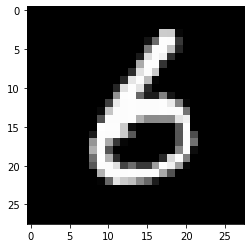

Prediction: 
Label:  5


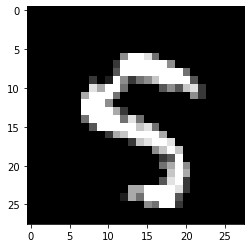

Prediction: 
Label:  9


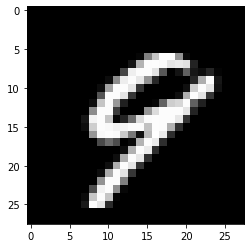

Prediction: 
Label:  6


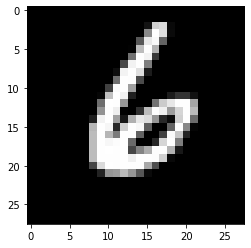

Prediction: 
Label:  3


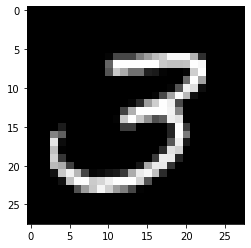

Prediction: 
Label:  0


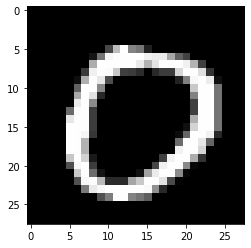

Prediction: 
Label:  2


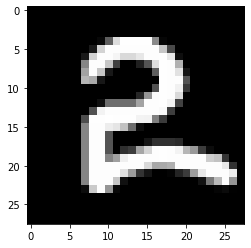

Prediction: 
Label:  9


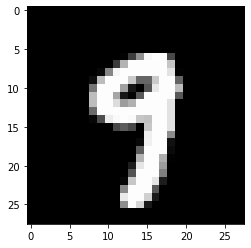

Prediction: 
Label:  0


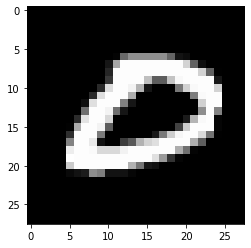

Prediction: 
Label:  1


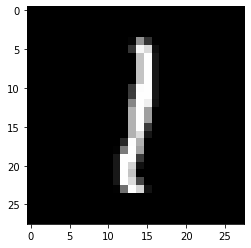

Prediction: 
Label:  7


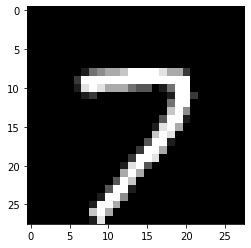

Prediction: 
Label:  1


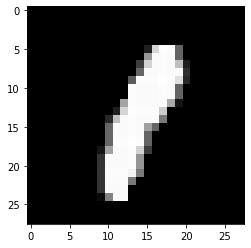

Prediction: 
Label:  9


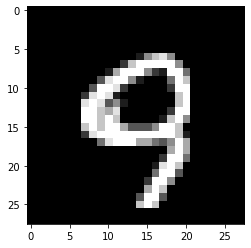

Prediction: 
Label:  8


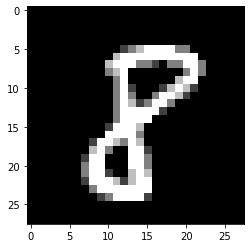

Prediction: 
Label:  2


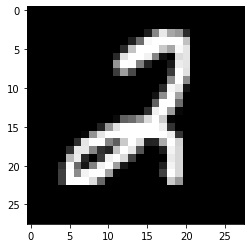

Prediction: 
Label:  6


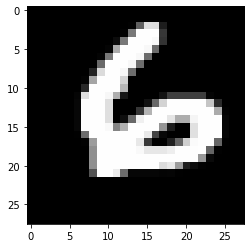

Prediction: 
Label:  3


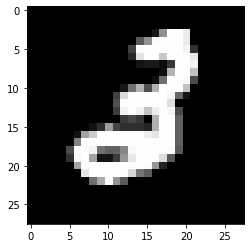

Prediction: 
Label:  6


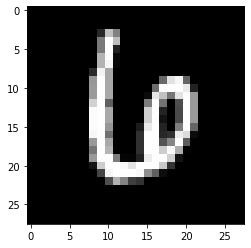

Prediction: 
Label:  4


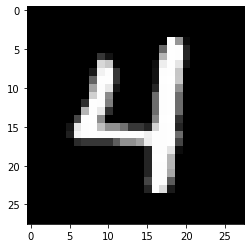

Prediction: 
Label:  8


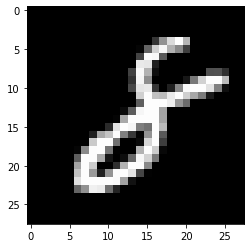

Prediction: 
Label:  4


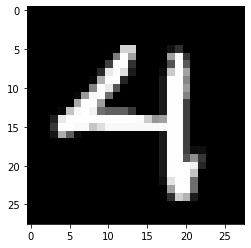

Prediction: 
Label:  5


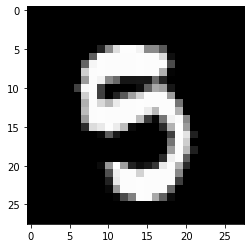

Prediction: 
Label:  9


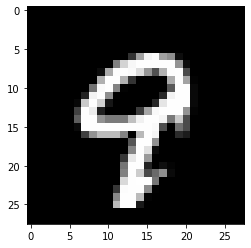

Prediction: 
Label:  8


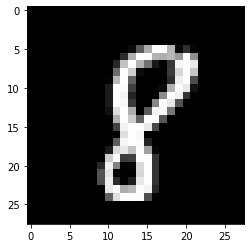

Prediction: 
Label:  8


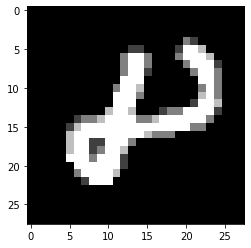

Prediction: 
Label:  4


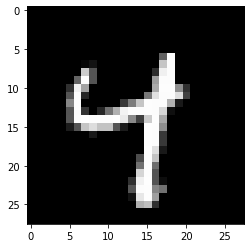

Prediction: 
Label:  7


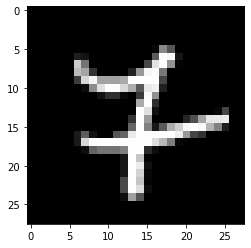

Prediction: 
Label:  9


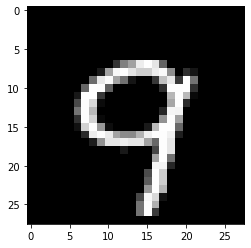

Prediction: 
Label:  5


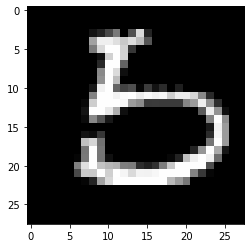

Prediction: 
Label:  2


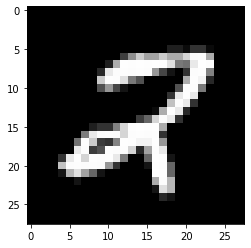

Prediction: 
Label:  1


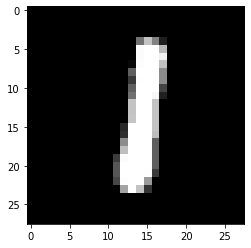

Prediction: 
Label:  4


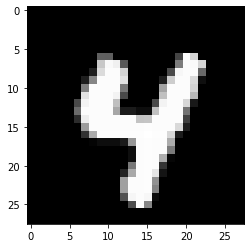

Prediction: 
Label:  0


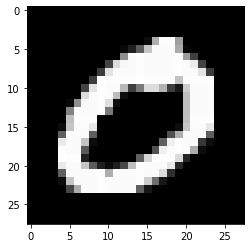

Prediction: 
Label:  4


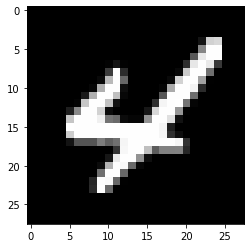

Prediction: 
Label:  9


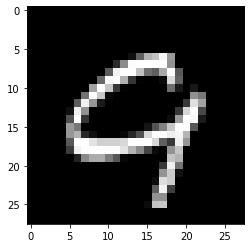

Prediction: 
Label:  2


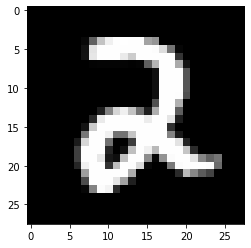

Prediction: 
Label:  7


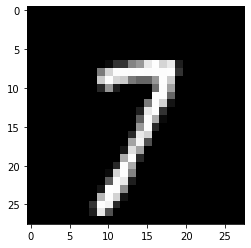

Prediction: 
Label:  0


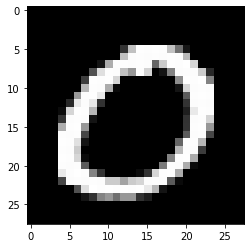

Prediction: 
Label:  6


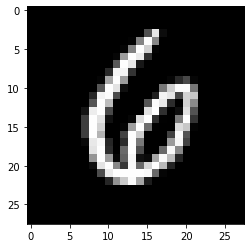

Prediction: 
Label:  6


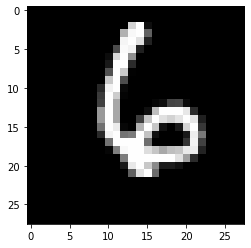

Prediction: 
Label:  2


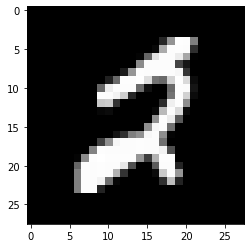

Prediction: 
Label:  8


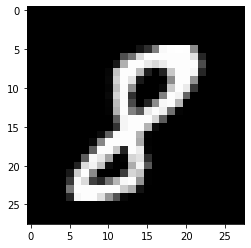

Prediction: 
Label:  1


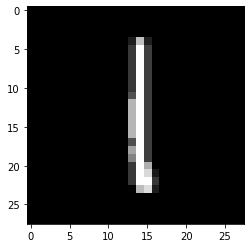

Prediction: 
Label:  8


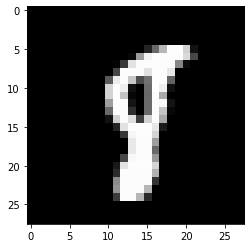

Prediction: 
Label:  9


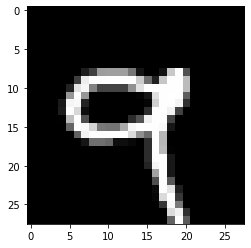

Prediction: 
Label:  7


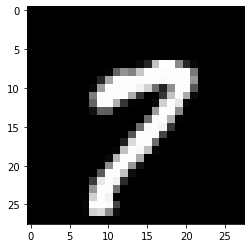

Prediction: 
Label:  7


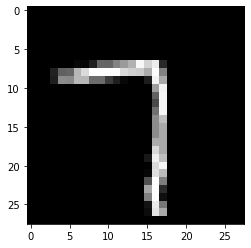

Prediction: 
Label:  1


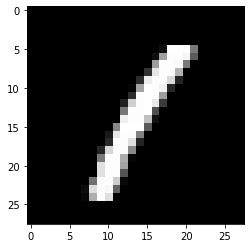

Prediction: 
Label:  7


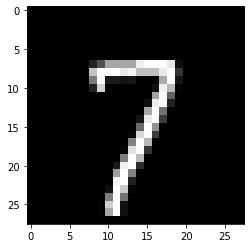

Prediction: 
Label:  2


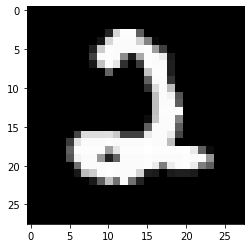

In [14]:
for i in range (50) :
    test_prediction(i, W1, b1, W2, b2)